# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [79]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


First, create some useful functions

In [80]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `mnist` dataset and normalize in the range [0, 1]

In [81]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


60000 train samples
10000 test samples


Create the CNN and show its architecture

In [82]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)
l5 = Dropout(0.5)(l3_mp)

flat = Flatten(name='flat')(l5)

l4 = Dense(25, activation='relu', name='l4')(flat)
l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0  

Define some constants and train de CNN

In [83]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.7545 - accuracy: 0.7473 - val_loss: 0.1506 - val_accuracy: 0.9599
Epoch 2/10
469/469 [==============================] - 16s 35ms/step - loss: 0.2420 - accuracy: 0.9265 - val_loss: 0.1120 - val_accuracy: 0.9637
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1913 - accuracy: 0.9409 - val_loss: 0.0785 - val_accuracy: 0.9742
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1658 - accuracy: 0.9489 - val_loss: 0.0693 - val_accuracy: 0.9776
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1491 - accuracy: 0.9547 - val_loss: 0.0623 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1367 - accuracy: 0.9575 - val_loss: 0.0567 - val_accuracy: 0.9826
Epoch 7/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1283 - accuracy: 0.9609 - val_loss: 0.0546 - val_accuracy:

Show the performance of the model

Test score: 0.04196002334356308
Test accuracy: 0.9851999878883362


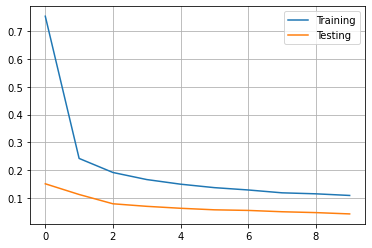

In [84]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])



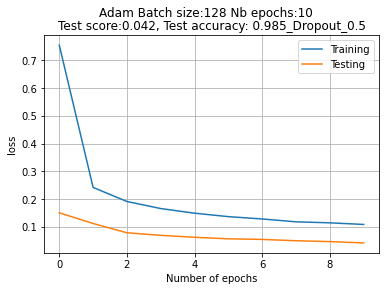

In [85]:
def plot_graph(history, optimName, batch_size, n_epoch, testScore, testAccuracy, drop):
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.suptitle(optimName+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch))
    pl.legend()
    pl.title('Test score:' + str(round(testScore,3)) + ', Test accuracy: '  + str(round(testAccuracy,3)) + '_Dropout_'+ ('None' if drop < 0 else str(drop)))
    pl.grid()
    pl.savefig('../outPutCNN/' + optimName+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+ '_Dropout_'+ ('None' if drop < 0 else str(drop)) + '.png', dpi=500)
    
plot_graph(history,'Adam', batch_size, n_epoch,score[0],score[1],0.5)

Confusion matrix

In [86]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 966,    0,    2,    1,    0,    2,    6,    1,    2,    0],
       [   0, 1122,    3,    0,    1,    2,    2,    3,    2,    0],
       [   2,    1, 1026,    0,    0,    0,    1,    1,    1,    0],
       [   0,    0,    0, 1004,    0,    3,    0,    1,    2,    0],
       [   0,    0,    1,    0,  959,    0,    6,    0,    0,   16],
       [   0,    0,    0,    7,    0,  881,    1,    1,    1,    1],
       [   2,    2,    1,    0,    1,    4,  946,    0,    2,    0],
       [   0,    1,    9,    2,    0,    0,    0, 1004,    2,   10],
       [   1,    0,    2,    0,    0,    5,    1,    2,  958,    5],
       [   2,    1,    1,    3,    6,    2,    0,    4,    4,  986]],
      dtype=int64)